# Brovey Pansharpening

La transformation Brovey a été élaborée dans le but d'augmenter le contraste visuel au niveau des extrémités supérieure et inférieure de l'histogramme des données. Elle fait appel à une méthode qui multiplie chaque pixel multispectral ré-échantillonné par le rapport de l'intensité du pixel panchromatique correspondant sur la somme de toutes les intensités multispectrales. Cette transformation suppose que **la gamme spectrale couverte par l'image panchromatique est identique à celle recouverte par les canaux multispectraux.**

Dans la transformation Brovey, l'équation générale utilise le rouge, le vert et le bleu (RVB), ainsi que les canaux panchromatiques pour générer de nouveaux canaux RVB, par exemple :

$$RedOut = (RedIn  * Panchromatic) / (BlueIn + GreenIn + RedIn)$$
$$GreenOut = (GreenIn  * Panchromatic) / (BlueIn + GreenIn + RedIn)$$
$$BlueOut = (BlueIn  * Panchromatic) / (BlueIn + GreenIn + RedIn)$$


In [1]:
# Import
import nbimporter
import matplotlib.pyplot as plt
import cv2
import numpy as np
from utils import pansharpening as utils

In [2]:
# Path jusqu'à nos images
PATH = "../images/our-images/"

In [3]:
bw, ds, original = utils.load_images("star-fort", "jpg")

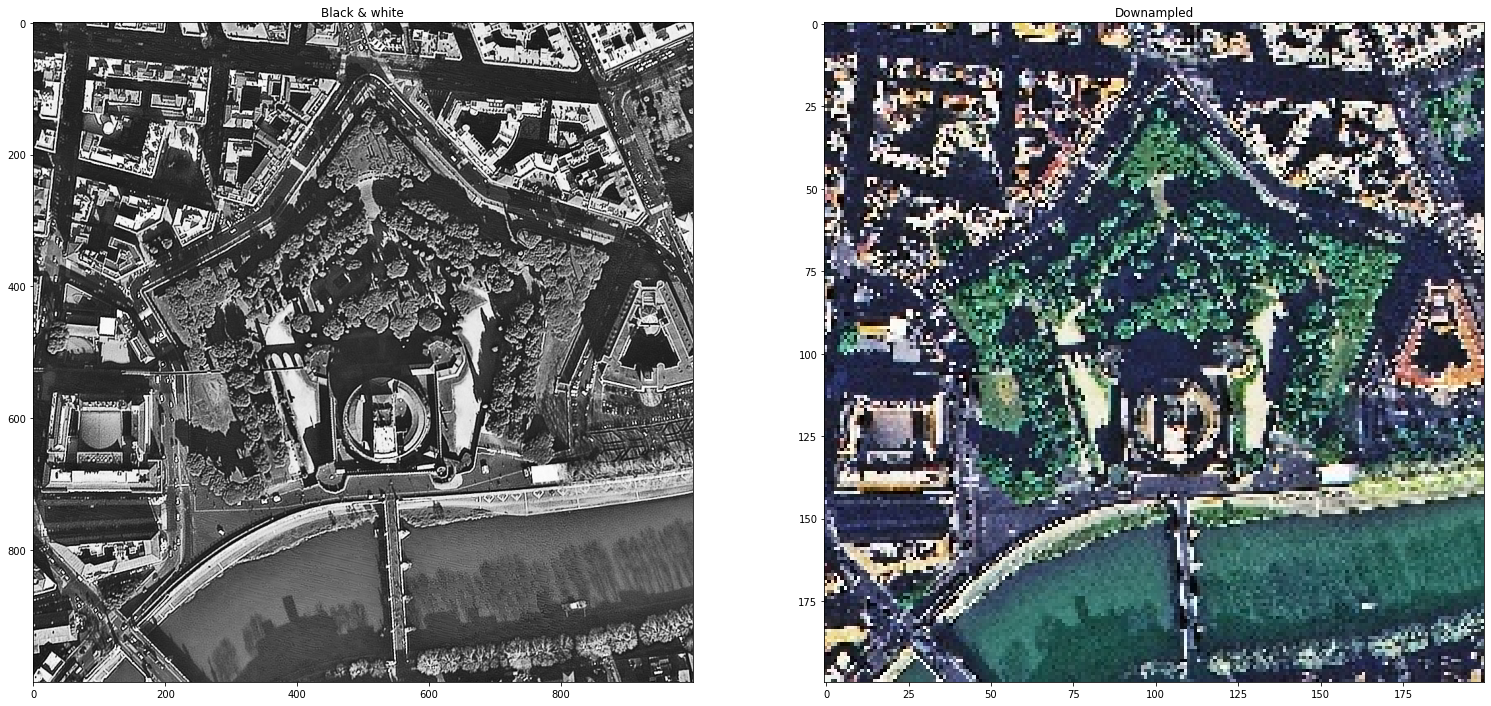

In [4]:
utils.plot_list([bw, ds], ['Black & white', 'Downampled'])

In [5]:
"""
brovey : Applique l'algorithme de pansharpehing de Brovey
bw     : L'image en Black&White
ds     : L'image en DownSampled, basse qualité en couleur
return : L'image pansharpened
"""
def brovey(bw, ds):
    bw_height, bw_width = bw.shape
    ds_height, ds_width, _ = ds.shape
    
    ds = cv2.resize(ds, dsize=(bw_height, bw_width))
    ds = ds.astype(float)
    
    pan = np.zeros((bw_height,bw_width,3), np.uint8)

    channels_sum = ds.sum(axis=2) / 3
    channels_sum[channels_sum == 0] = 1

    pan[:,:,0] = (ds[:,:,0] * bw) / channels_sum
    pan[:,:,1] = (ds[:,:,1] * bw) / channels_sum
    pan[:,:,2] = (ds[:,:,2] * bw) / channels_sum

    return pan    

In [6]:
pan = brovey(bw, ds)

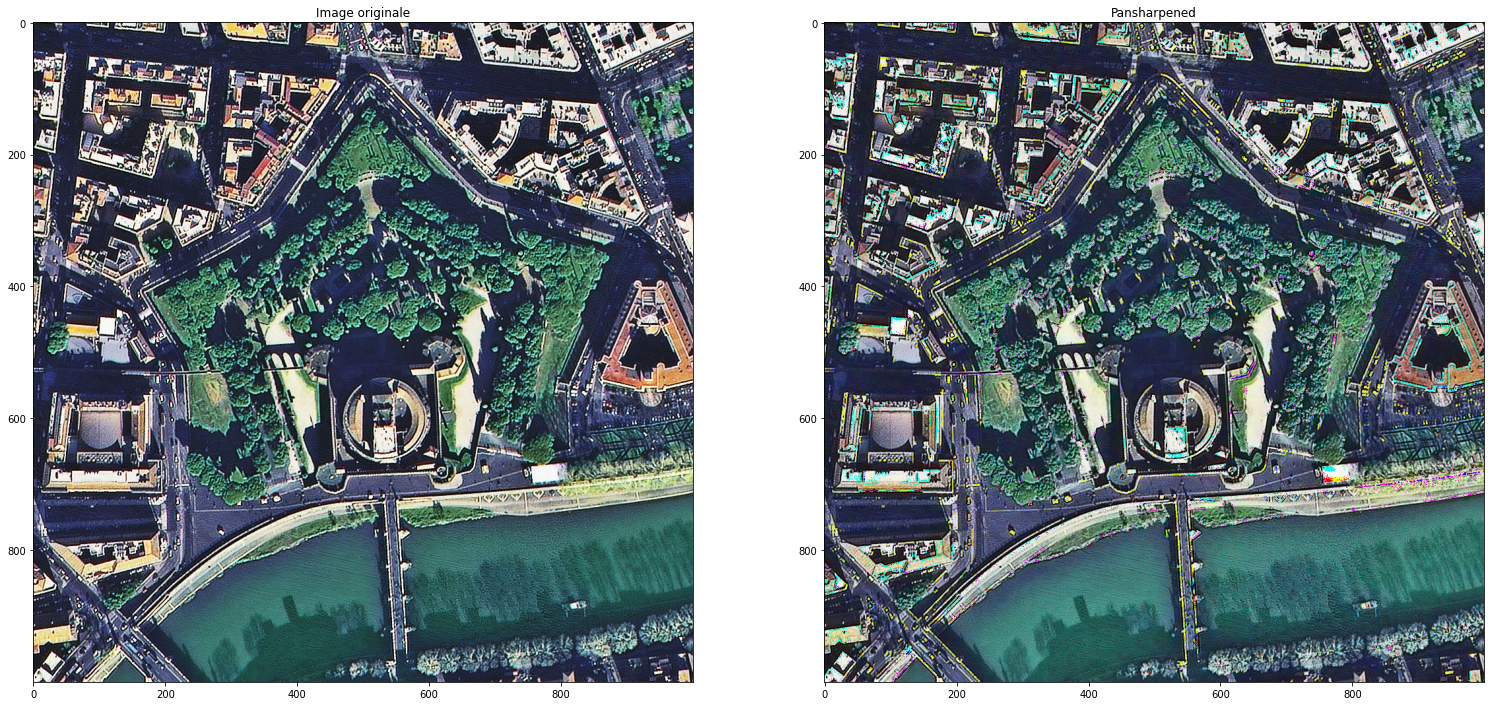

In [7]:
utils.plot_list([original, pan], ['Image originale', 'Pansharpened'])

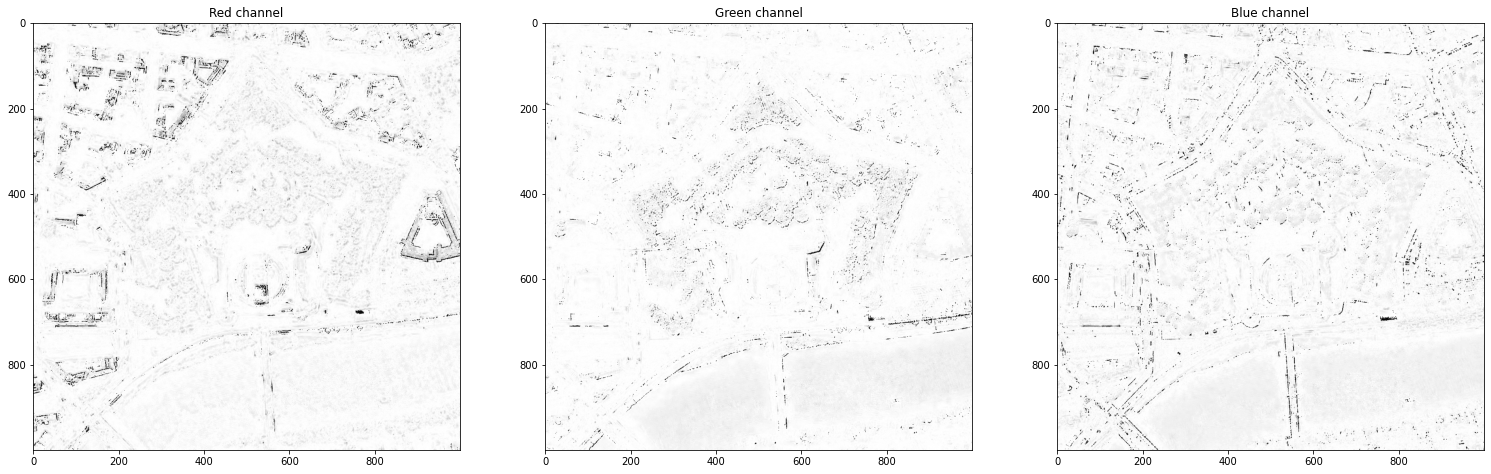

In [8]:
difference = utils.diff_channels(original, pan)